In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('Dados_Estatisticos (1).csv', on_bad_lines='skip', header=0, delimiter=';')

In [6]:
df = df[df['AEROPORTO_DE_ORIGEM_REGIAO'].isin(["SUDESTE"])]
df = df.reset_index(drop=True)

print(df['AEROPORTO_DE_ORIGEM_REGIAO'].unique())

['SUDESTE']


In [7]:
df = df[df['AEROPORTO_DE_DESTINO_REGIAO'].isin(["SUDESTE"])]
df = df.reset_index(drop=True)

print(df['AEROPORTO_DE_DESTINO_REGIAO'].unique())

['SUDESTE']


In [8]:
df = df[df['GRUPO_DE_VOO'].isin(['REGULAR'])]

In [9]:
print(len(df))

4860


In [10]:
print(df.columns)

Index(['EMPRESA_SIGLA', 'EMPRESA_NOME', 'EMPRESA_NACIONALIDADE', 'ANO', 'MES',
       'AEROPORTO_DE_ORIGEM_SIGLA', 'AEROPORTO_DE_ORIGEM_NOME',
       'AEROPORTO_DE_ORIGEM_UF', 'AEROPORTO_DE_ORIGEM_REGIAO',
       'AEROPORTO_DE_ORIGEM_PAIS', 'AEROPORTO_DE_ORIGEM_CONTINENTE',
       'AEROPORTO_DE_DESTINO_SIGLA', 'AEROPORTO_DE_DESTINO_NOME',
       'AEROPORTO_DE_DESTINO_UF', 'AEROPORTO_DE_DESTINO_REGIAO',
       'AEROPORTO_DE_DESTINO_PAIS', 'AEROPORTO_DE_DESTINO_CONTINENTE',
       'NATUREZA', 'GRUPO_DE_VOO', 'PASSAGEIROS_PAGOS', 'PASSAGEIROS_GRATIS',
       'CARGA_PAGA_KG', 'CARGA_GRATIS_KG', 'CORREIO_KG', 'ASK', 'RPK', 'ATK',
       'RTK', 'COMBUSTIVEL_LITROS', 'DISTANCIA_VOADA_KM', 'DECOLAGENS',
       'CARGA_PAGA_KM', 'CARGA_GRATIS_KM', 'CORREIO_KM', 'ASSENTOS', 'PAYLOAD',
       'HORAS_VOADAS', 'BAGAGEM_KG'],
      dtype='object')


In [11]:
# Lista única de empresas e siglas (sem repetições)
empresas = df[["EMPRESA_NOME", "EMPRESA_SIGLA"]].drop_duplicates()
print(empresas.sort_values("EMPRESA_NOME"))

                                           EMPRESA_NOME EMPRESA_SIGLA
3138                 ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG
476      AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA           AVA
0                               AMERICAN AIRLINES, INC.           AAL
2955                                      ATLAS AIR INC           GTI
7           AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN
478                  AZUL LINHAS AÉREAS BRASILEIRAS S/A           AZU
2006                CARGOLUX AIRLINES INTERNATIONAL S/A           CLX
7100                               DELTA AIR LINES INC.           DAL
2031                            DEUTSCHE LUFTHANSA A.G.           DLH
4791                                           EMIRATES           UAE
2049  GOL LINHAS AÉREAS S.A. (EX- VRG LINHAS AÉREAS ...           GLO
8058  IBÉRIA LINEAS AEREAS DE ESPAÑA SOCIEDAD ANONIM...           IBE
2970                 KLM CIA. REAL HOLANDESA DE AVIAÇÃO           KLM
3080                

In [12]:
#print(df)

print(df['AEROPORTO_DE_ORIGEM_NOME'].unique())
print(df['AEROPORTO_DE_ORIGEM_SIGLA'].unique())

['RIO DE JANEIRO' 'CONFINS' 'CAMPOS DOS GOYTACAZES' 'JUNDIAÍ' 'MACAÉ'
 'SÃO PAULO' 'VARGINHA' 'GOIANÁ' 'PATOS DE MINAS' 'TEÓFILO OTONI'
 'PARACATU' 'SÃO JOSÉ DO RIO PRETO' 'MONTES CLAROS' 'SÃO JOSÉ DOS CAMPOS'
 'VITÓRIA' 'ARAXÁ' 'CAMPINAS' 'GOVERNADOR VALADARES' 'SANTANA DO PARAÍSO'
 'MANHUAÇU' 'GUARULHOS' 'AREALVA' 'ARAÇATUBA' 'CABO FRIO'
 'PRESIDENTE PRUDENTE' 'MARÍLIA' 'RIBEIRÃO PRETO' 'UBERLÂNDIA' 'UBERABA'
 'BELO HORIZONTE' 'SÃO CARLOS' 'LINHARES' 'SALINAS' 'SOROCABA'
 'BRAGANÇA PAULISTA' 'SÃO JOÃO DA BOA VISTA' 'ARARAQUARA' 'MARICÁ'
 'DIVINÓPOLIS' 'FRANCA' 'BARRETOS']
['SBGL' 'SBCF' 'SBCP' 'SBJD' 'SBJR' 'SBME' 'SBRJ' 'SBSP' 'SBVG' 'SBZM'
 'SNPD' 'SNTO' 'SNZR' 'SBSR' 'SBMK' 'SBSJ' 'SBVT' 'SBAX' 'SBKP' 'SBGV'
 'SBIP' 'SNJM' 'SBGR' 'SBAE' 'SBAU' 'SBCB' 'SBDN' 'SBML' 'SBRP' 'SBUL'
 'SBUR' 'SBBH' 'SDSC' 'SNLN' 'SNSS' 'SDCO' 'SBBP' 'SDJV' 'SBAQ' 'SBMI'
 'SNDV' 'SIMK' 'SNBA']


In [13]:
df['TOTAL_PASSAGEIROS'] = df['PASSAGEIROS_PAGOS'] + df['PASSAGEIROS_GRATIS']

In [14]:
df['TRIMESTRE'] = (df['MES'] - 1) // 3 + 1

# Agrupar por empresa, ano e trimestre e somar passageiros
df_trimestral = df.groupby(['EMPRESA_NOME', 'EMPRESA_SIGLA', 'ANO', 'TRIMESTRE'])['TOTAL_PASSAGEIROS'].sum().reset_index()

In [15]:
df_trimestral = df.groupby(['EMPRESA_NOME', 'EMPRESA_SIGLA', 'ANO', 'TRIMESTRE'])['TOTAL_PASSAGEIROS'].sum().reset_index()
print(df_trimestral.head(10))  # Verifique os primeiros resultados

                                     EMPRESA_NOME EMPRESA_SIGLA   ANO  \
0              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023   
1              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023   
2              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023   
3              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023   
4              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2024   
5              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2024   
6              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2024   
7              ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2024   
8  AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA           AVA  2023   
9                         AMERICAN AIRLINES, INC.           AAL  2023   

   TRIMESTRE  TOTAL_PASSAGEIROS  
0          1                0.0  
1          2                0.0  
2          3                0.0  
3          4                0.0  
4          1              

In [16]:
df_filtrado = df_trimestral[df_trimestral['TOTAL_PASSAGEIROS'] != 0]

# Mostrar o DataFrame filtrado
print(df_filtrado)

                                         EMPRESA_NOME EMPRESA_SIGLA   ANO  \
8      AEROVIAS DEL CONTINENTE AMERICANO S.A. AVIANCA           AVA  2023   
17        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
18        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
19        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
20        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
21        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
22        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
23        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
24        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
25                 AZUL LINHAS AÉREAS BRASILEIRAS S/A           AZU  2023   
26                 AZUL LINHAS AÉREAS BRASILEIRAS S/A           AZU  2023   
27                 AZUL LINHAS AÉREAS BRASILEIRAS S/A           AZU  2023   

In [17]:
total_por_trimestre = df_trimestral.groupby(['ANO', 'TRIMESTRE'])['TOTAL_PASSAGEIROS'].sum().reset_index()
total_por_trimestre.rename(columns={'TOTAL_PASSAGEIROS': 'TOTAL_TRIMESTRE'}, inplace=True)

# Juntar com os dados das empresas para calcular o %
df_share = pd.merge(df_trimestral, total_por_trimestre, on=['ANO', 'TRIMESTRE'])
df_share['MARKET_SHARE'] = (df_share['TOTAL_PASSAGEIROS'] / df_share['TOTAL_TRIMESTRE']) * 100

print(df_share)

df_filtrado = df_share[df_share['TOTAL_PASSAGEIROS'] != 0]

# Mostrar o DataFrame filtrado
print(df_filtrado)

                           EMPRESA_NOME EMPRESA_SIGLA   ANO  TRIMESTRE  \
0    ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023          1   
1    ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023          2   
2    ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023          3   
3    ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2023          4   
4    ABSA - AEROLINHAS BRASILEIRAS S.A.           LTG  2024          1   
..                                  ...           ...   ...        ...   
111            TOTAL LINHAS AÉREAS S.A.           TTL  2024          3   
112            TOTAL LINHAS AÉREAS S.A.           TTL  2024          4   
113                TURKISH AIRLINES INC           THY  2023          1   
114     UPS - UNITED PARCEL SERVICE CO.           UPS  2023          3   
115     UPS - UNITED PARCEL SERVICE CO.           UPS  2024          1   

     TOTAL_PASSAGEIROS  TOTAL_TRIMESTRE  MARKET_SHARE  
0                  0.0        4141133.0           0.0  

In [18]:
# Filtrar as 5 maiores empresas (baseado no TOTAL_PASSAGEIROS)
top_5_empresas = df_share.groupby('EMPRESA_SIGLA')['TOTAL_PASSAGEIROS'].sum().nlargest(5).index.tolist()
df_top5 = df_share[df_share['EMPRESA_SIGLA'].isin(top_5_empresas)]

print(df_top5)

                                         EMPRESA_NOME EMPRESA_SIGLA   ANO  \
17        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
18        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
19        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
20        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2023   
21        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
22        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
23        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
24        AZUL CONECTA LTDA. (EX TWO TAXI AEREO LTDA)           ACN  2024   
25                 AZUL LINHAS AÉREAS BRASILEIRAS S/A           AZU  2023   
26                 AZUL LINHAS AÉREAS BRASILEIRAS S/A           AZU  2023   
27                 AZUL LINHAS AÉREAS BRASILEIRAS S/A           AZU  2023   
28                 AZUL LINHAS AÉREAS BRASILEIRAS S/A           AZU  2023   

C:\Users\guuss\AppData\Local\Temp\ipykernel_16080\1249281050.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top5['ANO_TRIMESTRE'] = df_top5['ANO'].astype(str) + '-T' + df_top5['TRIMESTRE'].astype(str)


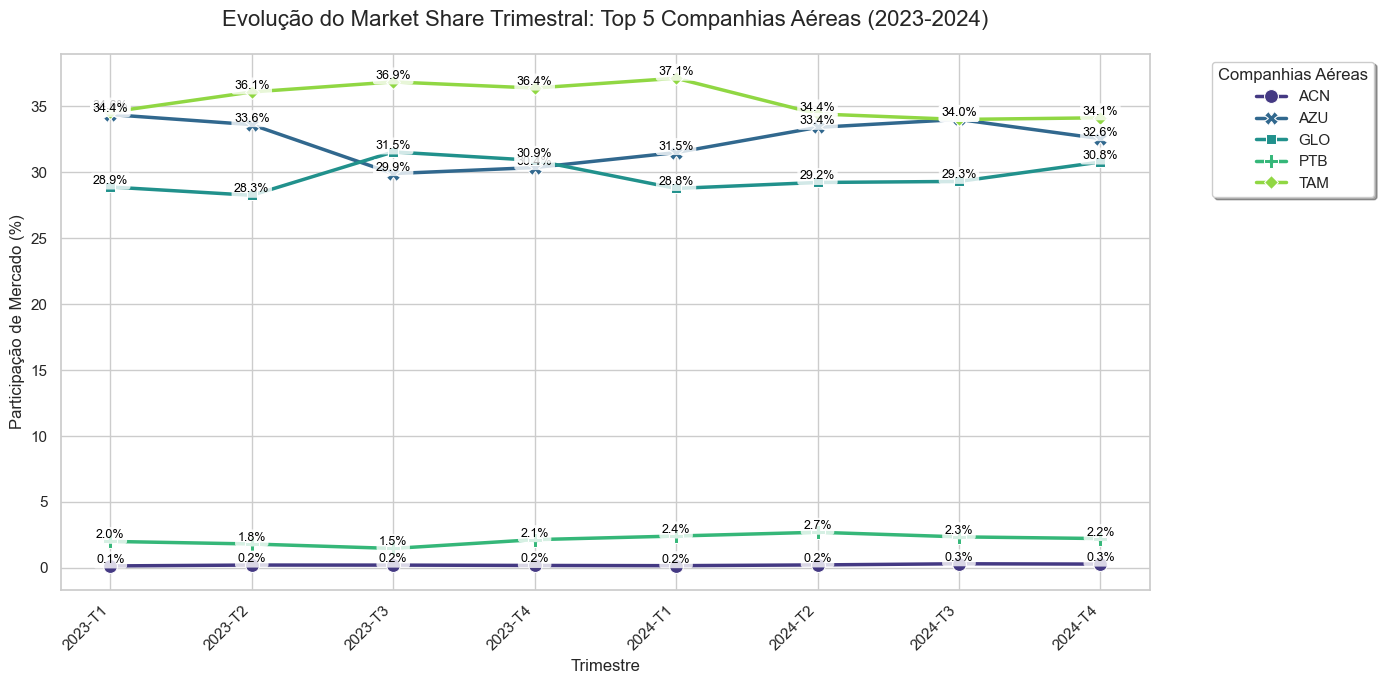

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# 1. Configuração do estilo
sns.set_theme(style="whitegrid", palette="pastel")  # Fundo com grid e cores suaves
plt.figure(figsize=(14, 7))

# 2. Criar coluna ANO-TRIMESTRE para o eixo X
df_top5['ANO_TRIMESTRE'] = df_top5['ANO'].astype(str) + '-T' + df_top5['TRIMESTRE'].astype(str)

# 3. Ordenar os dados
df_top5 = df_top5.sort_values(['ANO', 'TRIMESTRE'])

# 4. Plotar o gráfico de linhas com Seaborn
ax = sns.lineplot(
    data=df_top5,
    x='ANO_TRIMESTRE',
    y='MARKET_SHARE',
    hue='EMPRESA_SIGLA',
    style='EMPRESA_SIGLA',  # Estilo diferente para cada linha
    markers=True,           # Marcadores nos pontos
    dashes=False,           # Linhas contínuas
    linewidth=2.5,
    markersize=10,
    palette='viridis'       # Esquema de cores moderno
)

# 5. Personalizações avançadas
plt.title('Evolução do Market Share Trimestral: Top 5 Companhias Aéreas (2023-2024)',
          fontsize=16, pad=20)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Participação de Mercado (%)', fontsize=12)

# Ajustar legenda
ax.legend(
    title='Companhias Aéreas',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    shadow=True
)

# Adicionar valores nos pontos
for empresa in top_5_empresas:
    dados = df_top5[df_top5['EMPRESA_SIGLA'] == empresa]
    for index, row in dados.iterrows():
        ax.text(
            row['ANO_TRIMESTRE'],
            row['MARKET_SHARE'],
            f"{row['MARKET_SHARE']:.1f}%",
            color='black',
            ha='center',
            va='bottom',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', boxstyle='round,pad=0.2')
        )

# Rotacionar labels do eixo X
plt.xticks(rotation=45, ha='right')

# Ajustar layout
plt.tight_layout()

# 6. Mostrar o gráfico
plt.show()

C:\Users\guuss\AppData\Local\Temp\ipykernel_16080\1915678832.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_top_rotas['PERIODO'] = df_top_rotas['ANO'].astype(str) + '-T' + df_top_rotas['TRIMESTRE'].astype(str)


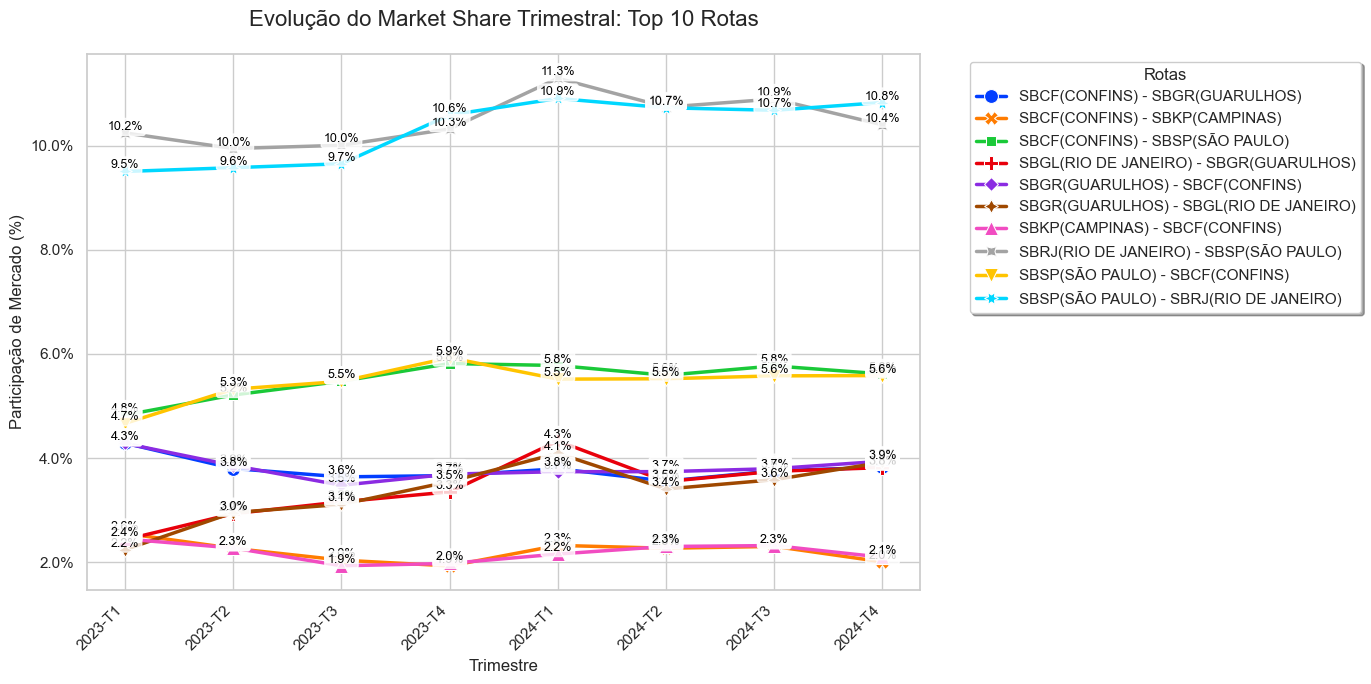

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 1. Pré-processamento
df['ROTA'] = df['AEROPORTO_DE_ORIGEM_SIGLA'] + '(' + df['AEROPORTO_DE_ORIGEM_NOME'] + ')' + ' - ' + df['AEROPORTO_DE_DESTINO_SIGLA'] + '(' + df['AEROPORTO_DE_DESTINO_NOME'] + ')'
df['TRIMESTRE'] = (df['MES'] - 1) // 3 + 1
df['TOTAL_PASSAGEIROS'] = df['PASSAGEIROS_PAGOS'] + df['PASSAGEIROS_GRATIS']

# 2. Cálculo do market share trimestral
total_trimestral = df.groupby(['ANO', 'TRIMESTRE'])['TOTAL_PASSAGEIROS'].sum().rename('TOTAL_TRIMESTRE')
df_share = (
    df.groupby(['ANO', 'TRIMESTRE', 'ROTA'])['TOTAL_PASSAGEIROS']
    .sum()
    .reset_index()
    .merge(total_trimestral, on=['ANO', 'TRIMESTRE'])
)
df_share['MARKET_SHARE'] = df_share['TOTAL_PASSAGEIROS'] / df_share['TOTAL_TRIMESTRE']

# 3. Selecionar top 5 rotas (baseado no market share médio)
top_rotas = (
    df_share.groupby('ROTA')['MARKET_SHARE']
    .mean()
    .nlargest(10)
    .index.tolist()
)
df_top_rotas = df_share[df_share['ROTA'].isin(top_rotas)]

# 4. Criar coluna ANO-TRIMESTRE para o eixo X
df_top_rotas['PERIODO'] = df_top_rotas['ANO'].astype(str) + '-T' + df_top_rotas['TRIMESTRE'].astype(str)

# 5. Configuração do gráfico
plt.figure(figsize=(14, 7))
sns.set_theme(style="whitegrid", palette="bright")

# 6. Gráfico de linhas
ax = sns.lineplot(
    data=df_top_rotas,
    x='PERIODO',
    y='MARKET_SHARE',
    hue='ROTA',
    style='ROTA',
    markers=True,
    dashes=False,
    linewidth=2.5,
    markersize=10,
    legend='full'
)

# 7. Personalização
plt.title('Evolução do Market Share Trimestral: Top 10 Rotas', fontsize=16, pad=20)
plt.xlabel('Trimestre', fontsize=12)
plt.ylabel('Participação de Mercado (%)', fontsize=12)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1.0))  # Formato %

# Rotacionar labels do eixo X
plt.xticks(rotation=45, ha='right')

# Ajustar legenda
plt.legend(
    title='Rotas',
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    frameon=True,
    shadow=True
)

# 8. Adicionar valores nos pontos
for rota in top_rotas:
    dados_rota = df_top_rotas[df_top_rotas['ROTA'] == rota]
    for _, row in dados_rota.iterrows():
        ax.text(
            row['PERIODO'],
            row['MARKET_SHARE'],
            f"{row['MARKET_SHARE']:.1%}",
            color='black',
            ha='center',
            va='bottom',
            fontsize=9,
            bbox=dict(facecolor='white', alpha=0.8, boxstyle='round,pad=0.2')
        )

plt.tight_layout()
plt.show()

C:\Users\guuss\AppData\Local\Temp\ipykernel_16080\1342937796.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


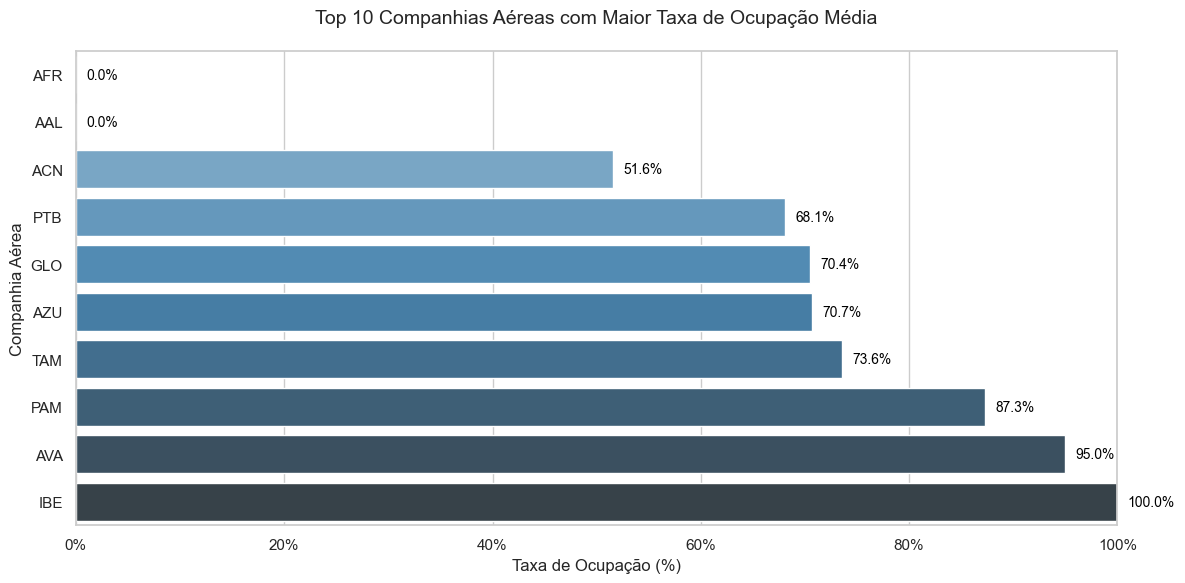

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# 1. Calcular taxa de ocupação
df['TAXA_OCUPACAO'] = (df['PASSAGEIROS_PAGOS'] + df['PASSAGEIROS_GRATIS']) / df['ASSENTOS'] * 100

# 2. Filtrar dados inválidos
df = df[df['ASSENTOS'] > 0]  # Remove voos com assentos zerados

# 3. Calcular média por empresa e selecionar top 10
top10_ocupacao = (
    df.groupby('EMPRESA_SIGLA')['TAXA_OCUPACAO']
    .mean()
    .nlargest(10)
    .sort_values()  # Ordena para melhor visualização no gráfico horizontal
)

# 4. Configuração do gráfico
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
paleta = sns.color_palette("Blues_d", n_colors=10)

# 5. Gráfico de barras horizontais
ax = sns.barplot(
    x=top10_ocupacao.values,
    y=top10_ocupacao.index,
    palette=paleta,
    orient='h'
)

# 6. Personalização
plt.title('Top 10 Companhias Aéreas com Maior Taxa de Ocupação Média', pad=20, fontsize=14)
plt.xlabel('Taxa de Ocupação (%)', fontsize=12)
plt.ylabel('Companhia Aérea', fontsize=12)
plt.xlim(0, 100)  # Limite de 0% a 100%

# Adicionar rótulos de valor
for i, valor in enumerate(top10_ocupacao.values):
    ax.text(
        valor + 1,  # Posição X (valor + pequeno offset)
        i,          # Posição Y (índice da barra)
        f'{valor:.1f}%',
        va='center',
        fontsize=10,
        color='black'
    )

# Formatar eixo X como porcentagem
ax.xaxis.set_major_formatter(PercentFormatter())

# 7. Ajustar layout e mostrar
plt.tight_layout()
plt.show()

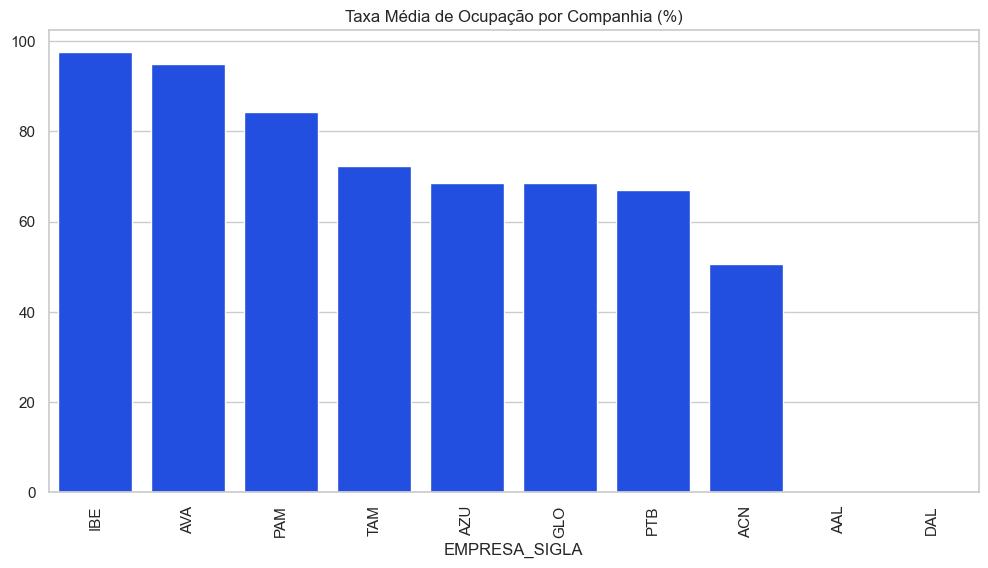

In [22]:
import numpy as np


df['Taxa_Ocupacao'] = np.where(df['ASSENTOS'] > 0, (df['PASSAGEIROS_PAGOS'] / df['ASSENTOS']) * 100, np.nan)
occupation = df.groupby('EMPRESA_SIGLA')['Taxa_Ocupacao'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=occupation.index, y=occupation.values)
plt.xticks(rotation=90)
plt.title("Taxa Média de Ocupação por Companhia (%)")
plt.show()

C:\Users\guuss\AppData\Local\Temp\ipykernel_16080\3931695601.py:2: RuntimeWarning: invalid value encountered in scalar divide
  lambda x: x['COMBUSTIVEL_LITROS'].sum() / x['DISTANCIA_VOADA_KM'].sum()
C:\Users\guuss\AppData\Local\Temp\ipykernel_16080\3931695601.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  eficiencia_combustivel = df.groupby('EMPRESA_SIGLA').apply(


Text(0.5, 0, 'Litros/KM')

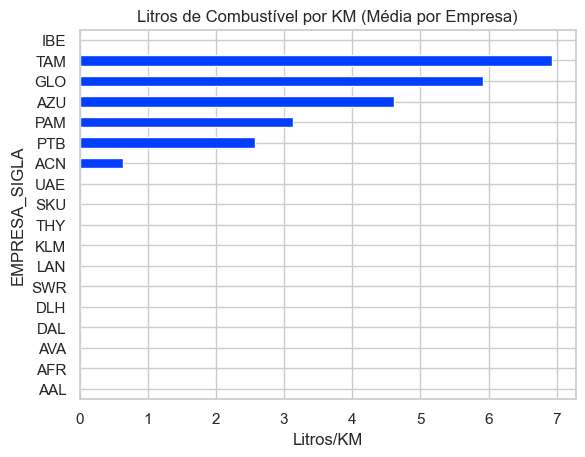

In [23]:
eficiencia_combustivel = df.groupby('EMPRESA_SIGLA').apply(
    lambda x: x['COMBUSTIVEL_LITROS'].sum() / x['DISTANCIA_VOADA_KM'].sum()
).sort_values()

eficiencia_combustivel.plot(kind='barh', title='Litros de Combustível por KM (Média por Empresa)')
plt.xlabel('Litros/KM')

In [24]:
print(df['ROTA'].unique())

['SBGL(RIO DE JANEIRO) - SBGR(GUARULHOS)'
 'SBCF(CONFINS) - SBGL(RIO DE JANEIRO)' 'SBCF(CONFINS) - SBVG(VARGINHA)'
 'SBCF(CONFINS) - SBZM(GOIANÁ)' 'SBCF(CONFINS) - SNPD(PATOS DE MINAS)'
 'SBCF(CONFINS) - SNTO(TEÓFILO OTONI)' 'SBCF(CONFINS) - SNZR(PARACATU)'
 'SBCP(CAMPOS DOS GOYTACAZES) - SBRJ(RIO DE JANEIRO)'
 'SBJD(JUNDIAÍ) - SBJR(RIO DE JANEIRO)'
 'SBJD(JUNDIAÍ) - SBRJ(RIO DE JANEIRO)' 'SBJD(JUNDIAÍ) - SBSP(SÃO PAULO)'
 'SBJR(RIO DE JANEIRO) - SBJD(JUNDIAÍ)'
 'SBJR(RIO DE JANEIRO) - SBSP(SÃO PAULO)'
 'SBME(MACAÉ) - SBRJ(RIO DE JANEIRO)'
 'SBRJ(RIO DE JANEIRO) - SBCP(CAMPOS DOS GOYTACAZES)'
 'SBRJ(RIO DE JANEIRO) - SBJD(JUNDIAÍ)'
 'SBRJ(RIO DE JANEIRO) - SBME(MACAÉ)'
 'SBRJ(RIO DE JANEIRO) - SBSP(SÃO PAULO)'
 'SBSP(SÃO PAULO) - SBJD(JUNDIAÍ)'
 'SBSP(SÃO PAULO) - SBJR(RIO DE JANEIRO)' 'SBVG(VARGINHA) - SBCF(CONFINS)'
 'SBZM(GOIANÁ) - SBCF(CONFINS)' 'SNPD(PATOS DE MINAS) - SBCF(CONFINS)'
 'SNTO(TEÓFILO OTONI) - SBCF(CONFINS)' 'SNZR(PARACATU) - SBCF(CONFINS)'
 'SBGL(RIO DE JANEIRO) - SB

Top 10 Rotas com Maior Desigualdade (Gini próximo de 1):
ROTA
SBAE(AREALVA) - SBGR(GUARULHOS)                  0.944444
SBAE(AREALVA) - SBKP(CAMPINAS)                   0.944444
SBAE(AREALVA) - SBML(MARÍLIA)                    0.944444
SBAE(AREALVA) - SBRP(RIBEIRÃO PRETO)             0.944444
SBAU(ARAÇATUBA) - SBAE(AREALVA)                  0.944444
SBAU(ARAÇATUBA) - SBGR(GUARULHOS)                0.944444
SBAU(ARAÇATUBA) - SBKP(CAMPINAS)                 0.944444
SBAU(ARAÇATUBA) - SBSR(SÃO JOSÉ DO RIO PRETO)    0.944444
SBAX(ARAXÁ) - SBGR(GUARULHOS)                    0.944444
SBAX(ARAXÁ) - SBUR(UBERABA)                      0.944444
dtype: float64

Média do Índice de Gini no Sudeste: 0.92


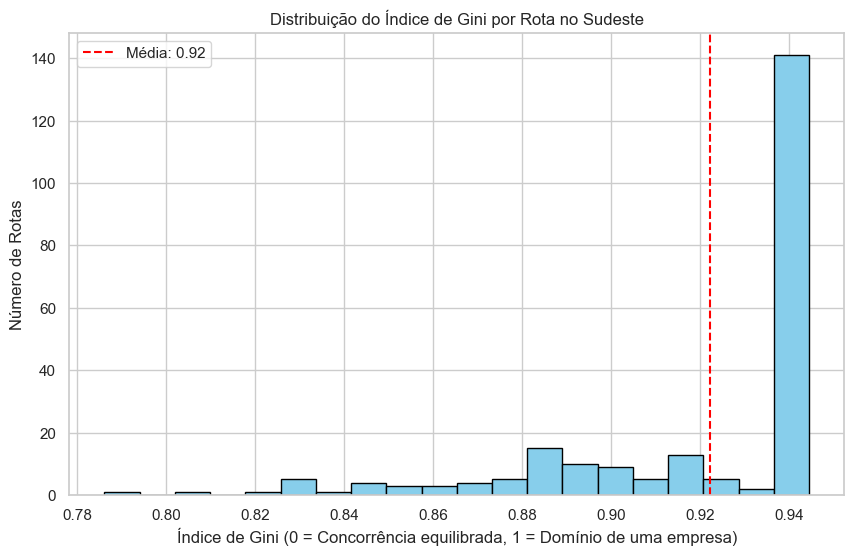

In [25]:
import pandas as pd
import numpy as np

# Função para calcular o Índice de Gini
def gini_coefficient(x):
    x = np.sort(x)  # Ordena os valores
    n = len(x)
    cumx = np.cumsum(x) / np.sum(x)  # Soma acumulada normalizada
    gini = (n + 1 - 2 * np.sum(cumx)) / n
    return gini


# Agrupar por rota e empresa para contar voos
distribuicao_rotas = df.groupby(['ROTA', 'EMPRESA_SIGLA']).size().unstack(fill_value=0)

# Calcular o Gini para cada rota
gini_por_rota = distribuicao_rotas.apply(gini_coefficient, axis=1)

# Resultados: Top 10 rotas com maior desigualdade (Gini próximo de 1)
print("Top 10 Rotas com Maior Desigualdade (Gini próximo de 1):")
print(gini_por_rota.sort_values(ascending=False).head(10))

# Média do Gini para todas as rotas
print(f"\nMédia do Índice de Gini no Sudeste: {gini_por_rota.mean():.2f}")

# Histograma da distribuição do Gini
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.hist(gini_por_rota, bins=20, color='skyblue', edgecolor='black')
plt.title('Distribuição do Índice de Gini por Rota no Sudeste')
plt.xlabel('Índice de Gini (0 = Concorrência equilibrada, 1 = Domínio de uma empresa)')
plt.ylabel('Número de Rotas')
plt.axvline(gini_por_rota.mean(), color='red', linestyle='dashed', label=f'Média: {gini_por_rota.mean():.2f}')
plt.legend()
plt.show()

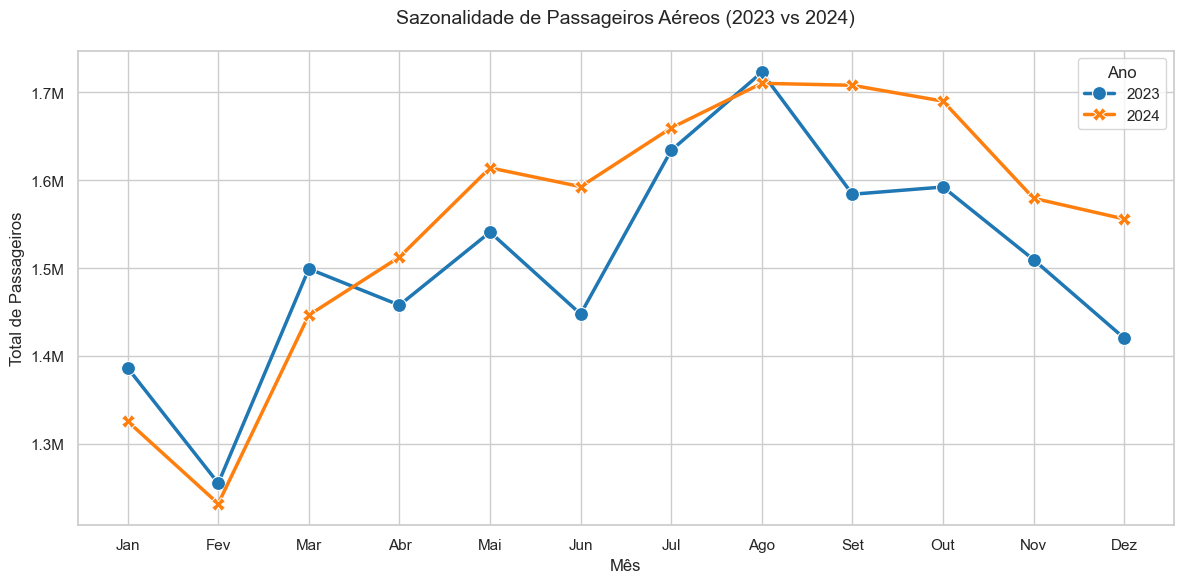

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Calcular o total de passageiros (pagos + grátis)
df['TOTAL_PASSAGEIROS'] = df['PASSAGEIROS_PAGOS'] + df['PASSAGEIROS_GRATIS']

# 2. Filtrar apenas 2023 e 2024 e agrupar por Ano/Mês
df_sazonal = df[df['ANO'].isin([2023, 2024])]  # Filtra apenas 2023 e 2024
passageiros_por_mes = df_sazonal.groupby(['ANO', 'MES'])['TOTAL_PASSAGEIROS'].sum().reset_index()

# 3. Criar o gráfico de linhas com Seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")  # Estilo com grid

# Gráfico de linha com marcadores ('o') e linhas estilizadas
ax = sns.lineplot(
    data=passageiros_por_mes,
    x='MES',
    y='TOTAL_PASSAGEIROS',
    hue='ANO',
    style='ANO',  # Estilo diferente para cada ano
    markers=True,  # Mostrar marcadores (bolinhas)
    dashes=False,  # Linhas contínuas (sem traços)
    palette=['#1f77b4', '#ff7f0e'],  # Cores (azul para 2023, laranja para 2024)
    linewidth=2.5,
    markersize=10,
)

# Personalizar eixos e legendas
plt.title('Sazonalidade de Passageiros Aéreos (2023 vs 2024)', fontsize=14, pad=20)
plt.xlabel('Mês', fontsize=12)
plt.ylabel('Total de Passageiros', fontsize=12)

# Definir ticks dos meses (1 a 12) com nomes abreviados
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']
plt.xticks(range(1, 13), meses, rotation=0)

# Ajustar legenda
plt.legend(title='Ano', title_fontsize=12, fontsize=11)

# Mostrar valor em milhões (ex: 1.5M) se os números forem muito grandes
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:.1f}M".format(x/1e6)))

plt.tight_layout()
plt.show()

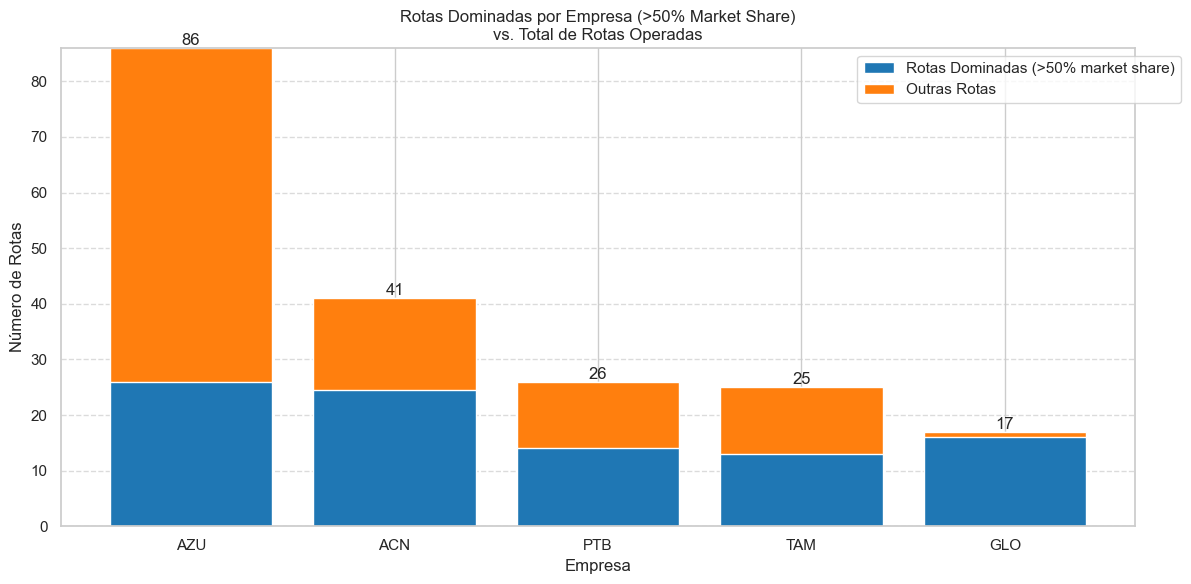

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# 1. Calcular o market share por empresa em cada rota (como no código anterior)
df_rota_empresa = df.groupby([
    'AEROPORTO_DE_ORIGEM_SIGLA', 
    'AEROPORTO_DE_DESTINO_SIGLA', 
    'EMPRESA_SIGLA'
])['PASSAGEIROS_PAGOS'].sum().reset_index()

df_total_rota = df_rota_empresa.groupby([
    'AEROPORTO_DE_ORIGEM_SIGLA', 
    'AEROPORTO_DE_DESTINO_SIGLA'
])['PASSAGEIROS_PAGOS'].sum().reset_index(name='TOTAL_ROTA')

df_final = pd.merge(
    df_rota_empresa, 
    df_total_rota, 
    on=['AEROPORTO_DE_ORIGEM_SIGLA', 'AEROPORTO_DE_DESTINO_SIGLA']
)
df_final['MARKET_SHARE'] = (df_final['PASSAGEIROS_PAGOS'] / df_final['TOTAL_ROTA']) * 100

# 2. Identificar rotas dominadas (market share > 50%)
df_dominancia = df_final[df_final['MARKET_SHARE'] > 50]
dominancia_counts = df_dominancia['EMPRESA_SIGLA'].value_counts()

# 3. Contar rotas totais por empresa (para contexto)
rotas_totais = df_final.groupby('EMPRESA_SIGLA')[
    ['AEROPORTO_DE_ORIGEM_SIGLA', 'AEROPORTO_DE_DESTINO_SIGLA']
].nunique().sum(axis=1) / 2  # Evitar dupla contagem origem-destino

# 4. Criar DataFrame para plotagem
df_plot = pd.DataFrame({
    'Empresa': dominancia_counts.index,
    'Rotas Dominadas': dominancia_counts.values,
    'Rotas Totais Operadas': rotas_totais[dominancia_counts.index].values
}).sort_values('Rotas Dominadas', ascending=False)

df_plot_top5 = df_plot.head(5)

# 5. Plotar gráfico de barras
plt.figure(figsize=(12, 6))
bars = plt.bar(
    df_plot_top5['Empresa'], 
    df_plot_top5['Rotas Dominadas'], 
    color='#1f77b4',
    label='Rotas Dominadas (>50% market share)'
)

plt.bar(
    df_plot_top5['Empresa'], 
    df_plot_top5['Rotas Totais Operadas'] - df_plot_top5['Rotas Dominadas'], 
    bottom=df_plot_top5['Rotas Dominadas'],
    color='#ff7f0e',
    label='Outras Rotas'
)

# Adicionar valores nas barras
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width()/2., 
        height,
        f'{int(height)}',
        ha='center', 
        va='bottom'
    )

plt.xlabel('Empresa')
plt.ylabel('Número de Rotas')
plt.title('Rotas Dominadas por Empresa (>50% Market Share)\nvs. Total de Rotas Operadas')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()